### We will try to estimate the long-term annual growth rate of the world using a regression model. 

 

 **(a)**  If the growth rate was a constant r, then the world’s GDP would grow as

$   GDP_k = GDP_0  (1 + r)^{k} \quad\quad\quad\quad\quad\quad\quad\quad   \text{,where k is the number of years since 1960 and } GDP_{0} \text{ is the world’s GDP in 1960} $


This is clearly not
a linear relationship between time (k, in years) and GDP. 

However, we can get a linear relationship
by applying a log transformation on both sides of the equation.  

In [2]:
from pandas_datareader import wb
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats
from scipy.stats import norm  

c:\Users\aprog\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas_datareader\wb.py:592: UserWarning: Non-standard ISO country codes: WLD
  warnings.warn(
C:\Users\aprog\AppData\Local\Temp\ipykernel_23812\176091908.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  gdp_data = wb.download(indicator='NY.GDP.MKTP.CD',


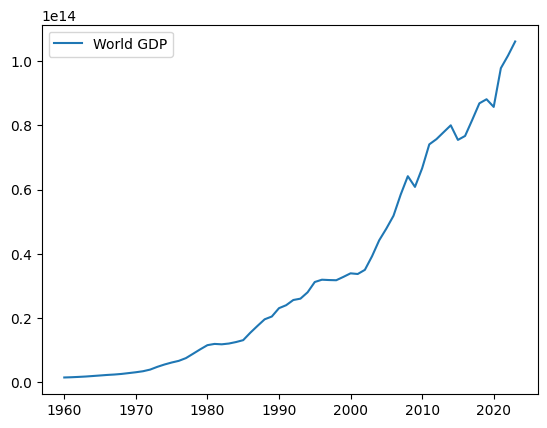

In [3]:
gdp_data = wb.download(indicator='NY.GDP.MKTP.CD',
                    country='WLD',
                    start='1960',
                    end='2023')

time = np.arange(1960, 2024) 
gdp = gdp_data.iloc[:, 0].astype(float).to_numpy()  # Extract and convert GDP data to numpy array

# Data is returned in reverse chronological order, so reverse the array
gdp = np.flip(gdp)

# Plot world GDP data against time
plt.plot(time, gdp, label='World GDP')
plt.legend()
plt.show()

Applying the log transformation to the GDP data, and performing a linear regression against the time variable. 

 R-squared is equal to 0.9639


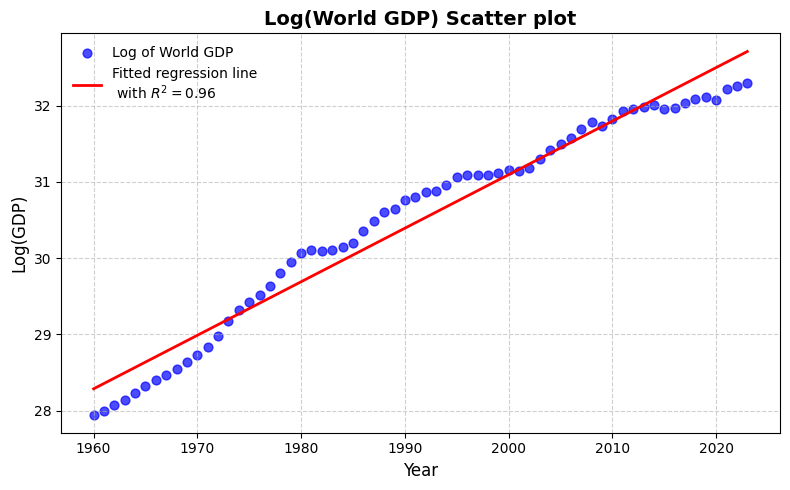

In [4]:
log_gdp = np.log(gdp)

b, a, r_value, p_value, std_err = stats.linregress(time , log_gdp)  
log_gdp_preds = a + b * time

sse = ( (log_gdp - log_gdp_preds)**2 ).sum() 
sst = ( (log_gdp - log_gdp.mean() )**2).sum()
r_sq = 1 - sse/sst
print(f" R-squared is equal to {r_sq:.4f}")  


#scatter plot of log_gdp and regression line
plt.figure(figsize=(8, 5))   

plt.scatter(time, log_gdp, color='blue', s=40, alpha=0.7, label='Log of World GDP') 
plt.plot(time, log_gdp_preds, color='red', linewidth=2, label=f'Fitted regression line \n with $R^2 = {r_sq:.2f}$') 
 
plt.xlabel('Year', fontsize=12)
plt.ylabel('Log(GDP)', fontsize=12)
plt.title('Log(World GDP) Scatter plot', fontsize=14, fontweight='bold')
plt.legend(frameon=False, fontsize=10)   
plt.grid(True, linestyle='--', alpha=0.6)  
plt.tight_layout()  
plt.show()

Performing a KS-test to determine whether we
can reject the null hypothesis that the residuals are sampled from a normal distribution with mean
0 and standard deviation  $ \hat{σ} $. 

We take α = 99%

In [5]:
residuals = log_gdp - log_gdp_preds

print( f' The residuals have mean {residuals.mean()} and standard deviation {residuals.std():.3f} ' )

 The residuals have mean -1.0547118733938987e-15 and standard deviation 0.251 


In [6]:
ks_stat, p_value = stats.kstest(residuals, norm.cdf, args= (0,residuals.std()) )
alpha = 0.99 

print(f"KS Statistic: {ks_stat:.4f}, p-value: {p_value:.4f}")
if p_value < (1- alpha) :
    print(f"We reject the null hypothesis at a significance level of {alpha}% and therefore we conclude that the residuals do not follow a normal distribution (0,Std(residuals)).")
else:
    print(f"We fail to reject the null hypothesis at a significance level of {alpha}% and therefore we fail to reject the statement that the residuals follow a normal distribution (0,Std(residuals))."
          "\nThus we conclude that the residuals ~ Norm(0,Std(residuals)).")
    


KS Statistic: 0.1370, p-value: 0.1649
We fail to reject the null hypothesis at a significance level of 0.99% and therefore we fail to reject the statement that the residuals follow a normal distribution (0,Std(residuals)).
Thus we conclude that the residuals ~ Norm(0,Std(residuals)).


We now apply the inverse of the log transformation (i.e. exponenent) to our linear model in order to get a
non-linear model for the GDP.  

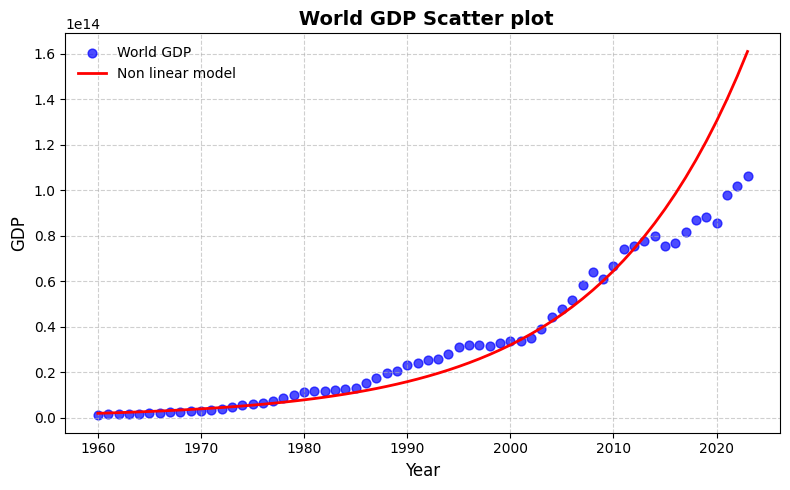

In [7]:
non_linear_preds = np.exp( log_gdp_preds )

plt.figure(figsize=(8, 5))   

plt.scatter(time, gdp, color='blue', s=40, alpha=0.7, label='World GDP')   
plt.plot(time, non_linear_preds, color='red', linewidth=2,  label=f'Non linear model')    
plt.xlabel('Year', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title(' World GDP Scatter plot', fontsize=14, fontweight='bold')

plt.legend(frameon=False, fontsize=10)   
plt.grid(True, linestyle='--', alpha=0.6)   
plt.tight_layout()   
plt.show()

# Slope and growth-rate formula relationship Derivation

### Regression Formula:
$$
\log(Gdp_k) = a + b \cdot (k + 1960) \quad\quad , \text{where k is the number of years since 1960} \tag{1}
$$

### General Intuition Formula:
$$
Gdp_k = Gdp_0 \cdot (1 + r)^k \quad\quad\quad\quad\quad , \text{where k is the number of years since 1960} \tag{2}
$$

From equation (2):
$$
\log(Gdp_k) = \log( Gdp_0 \cdot (1 + r)^k )
$$
$$
\Longleftrightarrow \log(Gdp_k) = \log(Gdp_0) + k \cdot \log(1 + r)
$$

### Combining equations (1) and (2) :
$$
a + b \cdot (k + 1960) = \log(Gdp_0) + k \cdot \log(1 + r)
$$

Rearranging:
$$
(a + 1960 \cdot b) + b \cdot k = \log(Gdp_0) + \log(1 + r) \cdot k
$$

### Coefficient Comparison yields:
$$
b  =  \log(1 + r) \implies r = e^b - 1
$$


In [8]:
r = np.exp(b) - 1
print(f'Long term growth is estimated as {r :.3f}')

Long term growth is estimated as 0.073


### Remark:

 Since 1960 we observe a relatively constant growth rate of the world GDP until 2015. From approximately 2015 onwards we can observe a slight decrease of the growth rate of the world's GDP as we can observe from both the linear and non-linear model. 